In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("covid_toy.csv")

In [4]:
df.isnull().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [5]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.2 and df[var].isnull().mean()>0]

In [6]:
cols

['fever']

In [7]:
df[cols].sample(10)

,fever
72,101.0
32,101.0
60,102.0
64,104.0
28,104.0
94,NaN
48,99.0
40,102.0
69,103.0
37,100.0


In [8]:
len(df[cols].dropna())/len(df)

0.9

In [9]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((100, 6), (90, 1))

In [10]:
import matplotlib.pyplot as plt

<Axes: >

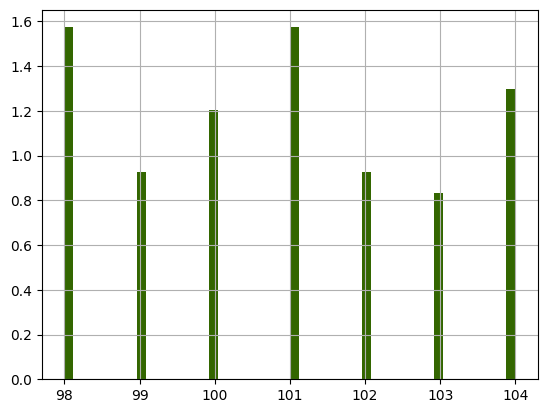

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["fever"].hist(bins=50,ax=ax,density=True,color="red")
new_df["fever"].hist(bins=50,ax=ax,color='green', density=True, alpha=0.8)


In [12]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['fever'].value_counts() / len(df),
        
        # percentage of observations per category, cca data
        new_df['fever'].value_counts() / len(new_df)
        ],
        axis=1)
        
# add column names
temp.columns = ['original', 'cca']      
temp

,original,cca
fever,,
101.0,0.17,0.188889
98.0,0.17,0.188889
104.0,0.14,0.155556
100.0,0.13,0.144444
99.0,0.10,0.111111
102.0,0.10,0.111111
103.0,0.09,0.100000


In [13]:
# Standardization -- > mean = , std = 1


# Normalization ------ > min = 0 , max = 1
# Encoding ---- >
# (a). Label --- > 1-1 coolumn apply
# (b). Ordinal --- > multiple columns apply , we can set our sub-category .
# (c). OneHot --- > Column --- > sub-category --- > New_column
# (d). get_dummies -- I-> Column --- > New_column + with_column_name

# Function Transformer ----- > dataset --- > custom logic apply .

# ColumnTransformer --- > way --- > (constant , 'approach_name' , 'column_name' )

# Pipeline ----- > way --- > steps of process --- > output of first step will be input of second step .

# CCA ---- >after missing data drop and befire missing data drop --- > if Architecture is overlap -- >
# we can drop the missing data .

# Outliers ---- > check --- > boxplot , handle --- > trimming , capping .

